## 普通にグラフを作成(Zシンドロームは下の重み付け)

/var/folders/z2/d7v_26mx7_s1sc2tvt5zxxmc0000gn/T/ipykernel_71120/2302055005.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.round(a,decimals= 2))


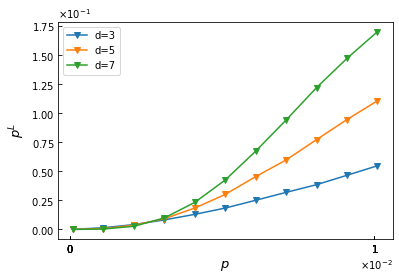

/var/folders/z2/d7v_26mx7_s1sc2tvt5zxxmc0000gn/T/ipykernel_71120/2302055005.py:65: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.round(a,decimals= 2))


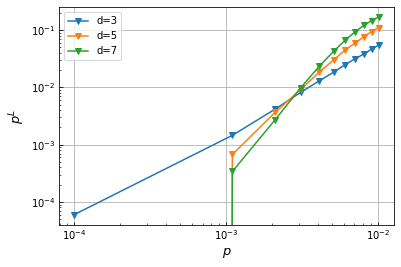

In [4]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os
import matplotlib.ticker as ptick


################ 要変更 #################
# 追加のフォルダ名
folder = ""
# ファイル名
file = "Xerror,p=(0.0001,0.01,0.001),d=(3,7,2),d(rep)=11,eta=1000,trials=200000" + ".csv"
########################################

# FUjii-labのパス
path = "/Users/konohideki/Documents/Fujii-lab/surface(ideal)/circuit"

# csvファイルの読み込み
os.chdir(path+folder)
data = pd.read_csv(file, index_col=0)

# データフレームの行名(リスト)を取得
code_distance_list = data.index

# データフレームの列名(リスト)を取得
p_list = data.columns

##### グラフ作成 #####

plt.rcParams["xtick.direction"] = "in"     
plt.rcParams["ytick.direction"] = "in" 
fig, ax = plt.subplots()
for i in range(len(code_distance_list)):
    a = np.array(p_list)
    a = [float(num) for num in a]
    a = np.array(a)
    b = np.array(data.loc[code_distance_list[i]])
    ax.plot(a[0:], b[0:],marker='v',label="d="+str(code_distance_list[i]))
ax.set_xticklabels(np.round(a,decimals= 2))
ax.set_xticks(np.round(a,decimals= 2))
ax.set_xlabel(r"$p$", fontsize=13)
ax.set_ylabel(r"$p^{L}$", fontsize=13)
#ax.set_xlim(0,)
#ax.set_ylim(0,)
#ax.set_title("X,p=(0.0001,0.0009,0.0001),d=(3,9,2),d(rep)=5,eta=1000,trials=10000", fontsize=14)
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) # x軸指数表記
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
plt.legend()
plt.show()


plt.rcParams["xtick.direction"] = "in"     
plt.rcParams["ytick.direction"] = "in" 
fig, ax = plt.subplots()
for i in range(len(code_distance_list)):
    a = np.array(p_list)
    a = [float(num) for num in a]
    a = np.array(a)
    b = np.array(data.loc[code_distance_list[i]])
    ax.plot(a[0:], b[0:],marker='v',label="d="+str(code_distance_list[i]))
ax.set_xticklabels(np.round(a,decimals= 2))
ax.set_xticks(np.round(a,decimals= 2))
ax.set_xlabel(r"$p$", fontsize=13)
ax.set_ylabel(r"$p^{L}$", fontsize=13)
#ax.set_ylim(10**(-3))
#ax.set_xlim(10**(-10))
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) # x軸指数表記
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
ax.set_xscale("log")
ax.set_yscale("log")
ax.grid()
plt.legend()
plt.show()

/var/folders/z2/d7v_26mx7_s1sc2tvt5zxxmc0000gn/T/ipykernel_71120/2302055005.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.round(a,decimals= 2))


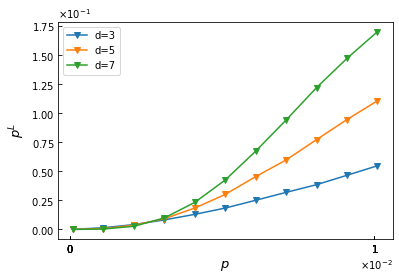

/var/folders/z2/d7v_26mx7_s1sc2tvt5zxxmc0000gn/T/ipykernel_71120/2302055005.py:65: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.round(a,decimals= 2))


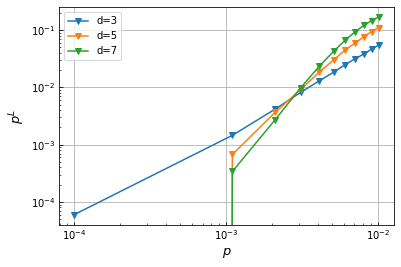

In [6]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os
import matplotlib.ticker as ptick


################ 要変更 #################
# 追加のフォルダ名
folder = ""
# ファイル名
file = "Xerror,p=(0.0001,0.01,0.001),d=(3,7,2),d(rep)=11,eta=1000,trials=200000" + ".csv"
########################################

# FUjii-labのパス
path = "/Users/konohideki/Documents/Fujii-lab/surface(ideal)/circuit"

# csvファイルの読み込み
os.chdir(path+folder)
data = pd.read_csv(file, index_col=0)

# データフレームの行名(リスト)を取得
code_distance_list = data.index

# データフレームの列名(リスト)を取得
p_list = data.columns

##### グラフ作成 #####

plt.rcParams["xtick.direction"] = "in"     
plt.rcParams["ytick.direction"] = "in" 
fig, ax = plt.subplots()
for i in range(len(code_distance_list)):
    a = np.array(p_list)
    a = [float(num) for num in a]
    a = np.array(a)
    b = np.array(data.loc[code_distance_list[i]])
    ax.plot(a[0:], b[0:],marker='v',label="d="+str(code_distance_list[i]))
ax.set_xticklabels(np.round(a,decimals= 2))
ax.set_xticks(np.round(a,decimals= 2))
ax.set_xlabel(r"$p$", fontsize=13)
ax.set_ylabel(r"$p^{L}$", fontsize=13)
#ax.set_xlim(0,)
#ax.set_ylim(0,)
#ax.set_title("X,p=(0.0001,0.0009,0.0001),d=(3,9,2),d(rep)=5,eta=1000,trials=10000", fontsize=14)
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) # x軸指数表記
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
plt.legend()
plt.show()


plt.rcParams["xtick.direction"] = "in"     
plt.rcParams["ytick.direction"] = "in" 
fig, ax = plt.subplots()
for i in range(len(code_distance_list)):
    a = np.array(p_list)
    a = [float(num) for num in a]
    a = np.array(a)
    b = np.array(data.loc[code_distance_list[i]])
    ax.plot(a[0:], b[0:],marker='v',label="d="+str(code_distance_list[i]))
ax.set_xticklabels(np.round(a,decimals= 2))
ax.set_xticks(np.round(a,decimals= 2))
ax.set_xlabel(r"$p$", fontsize=13)
ax.set_ylabel(r"$p^{L}$", fontsize=13)
#ax.set_ylim(10**(-3))
#ax.set_xlim(10**(-10))
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) # x軸指数表記
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
ax.set_xscale("log")
ax.set_yscale("log")
ax.grid()
plt.legend()
plt.show()